# Gabarito
## Preveja os usuários com alta chance de deixar seu produto
### Overview
Você trabalha em uma plataforma de telemarketing e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar o produto antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Etapa 01) Análise exploratória dos dados (Data Understanding)

### Importar bibliotecas necessárias

In [42]:
!pip install feature-engine
!pip install scikit-optimize
!pip install scikit-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# análise de dados
import pandas as pd
import numpy as np

# visualização 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# divisão da base de dados
from sklearn.model_selection import train_test_split

# tratamento dos dados categóricos e numéricos
from sklearn.preprocessing import MinMaxScaler

# classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# métricas de avaliação de qualidade
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, ConfusionMatrixDisplay

# remoção de aviso de erro para o BayesSearchCV
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

# Acessar o drive
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/My Drive/Colab Notebooks/

## Data Understanding

### Importar base de dados

In [44]:
#Lendo os Dados
df= pd.read_csv('/content/drive/MyDrive/Datasets/Telecom_Churn.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
#Estatísticas Descritivas de todas as colunas

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [46]:
#Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
#Verificando a Quantidade de Nulos
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

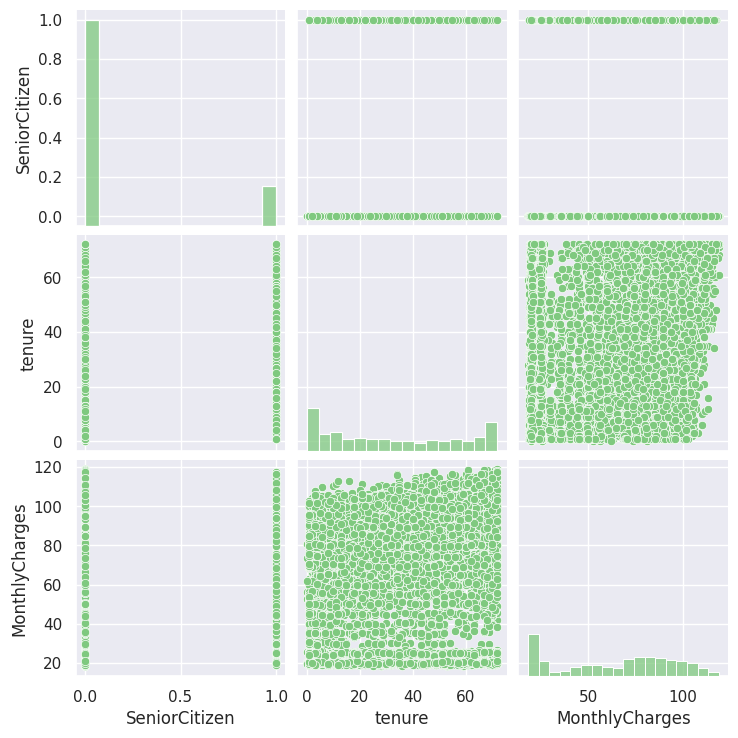

In [62]:
ax = sns.pairplot(df)

In [49]:
#Agrupando Clientes que deram churn por userid
Churn_UserId = df.groupby("Churn")['customerID'].count().reset_index()

<Axes: xlabel='Churn', ylabel='customerID'>

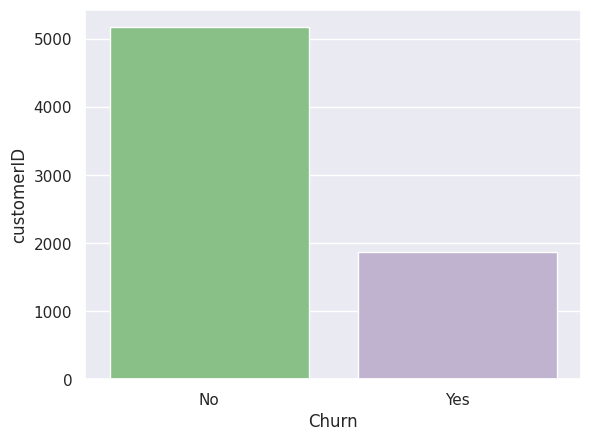

In [50]:
#Plotando quantidade de clientes que deram churn (1) e que não deram churn (0)
sns.barplot(data=Churn_UserId, x = "Churn",y = "customerID")

In [55]:
#Agrupando quantidade de clientes por plano
Churn_Contract = df.query("Churn == 'Yes'")
Churn_Contract = Churn_Contract.groupby("Contract")['customerID'].count().reset_index()
Churn_Contract = pd.DataFrame(Churn_Contract)
Churn_Contract

,Contract,customerID
0,Month-to-month,1655
1,One year,166
2,Two year,48


<Axes: xlabel='customerID', ylabel='Contract'>

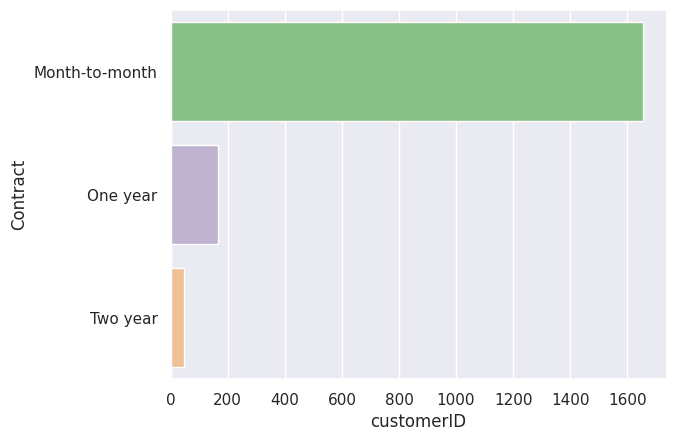

In [56]:
#Plotando quantidade de clientes por plano
sns.barplot(data=Churn_Contract, x = "customerID",y = "Contract")

In [59]:
#Agrupando quantidade de clientes por genero
Churn_gender = df.query("Churn == 'Yes'")
Churn_gender = Churn_gender.groupby("gender")['customerID'].count().reset_index()
Churn_gender = pd.DataFrame(Churn_gender)
Churn_gender

,gender,customerID
0,Female,939
1,Male,930


<Axes: xlabel='customerID', ylabel='gender'>

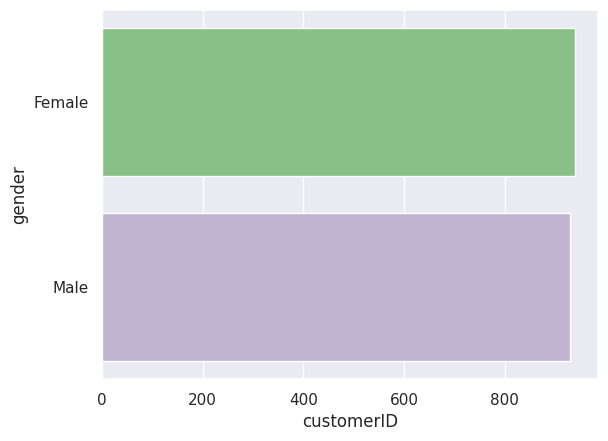

In [61]:
#Plotando quantidade de clientes por genero
sns.barplot(data=Churn_gender, x = "customerID",y = "gender")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
#Agrupando quantidade de clientes por genero
Churn_InternetService = df.query("Churn == 'Yes'")
Churn_InternetService = Churn_InternetService.groupby("InternetService")['customerID'].count().reset_index()
Churn_InternetService = pd.DataFrame(Churn_InternetService)
Churn_InternetService

,InternetService,customerID
0,DSL,459
1,Fiber optic,1297
2,No,113


<Axes: xlabel='customerID', ylabel='InternetService'>

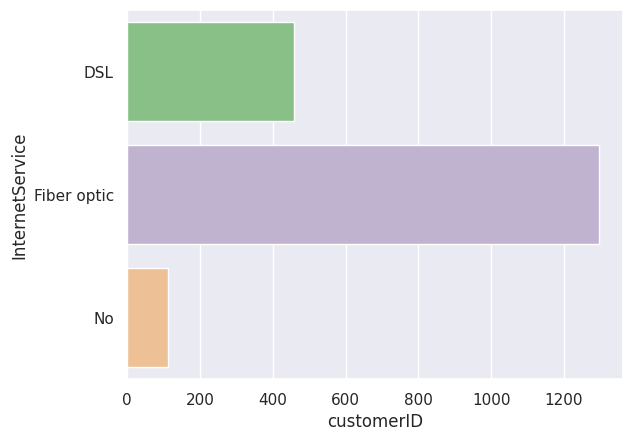

In [67]:
#Plotando quantidade de clientes por genero
sns.barplot(data=Churn_InternetService, x = "customerID",y = "InternetService")

In [68]:
#Agrupando quantidade de clientes por genero
Churn_StreamingTV = df.query("Churn == 'Yes'")
Churn_StreamingTV = Churn_StreamingTV.groupby("StreamingTV")['customerID'].count().reset_index()
Churn_StreamingTV = pd.DataFrame(Churn_StreamingTV)
Churn_StreamingTV

,StreamingTV,customerID
0,No,942
1,No internet service,113
2,Yes,814


<Axes: xlabel='customerID', ylabel='StreamingTV'>

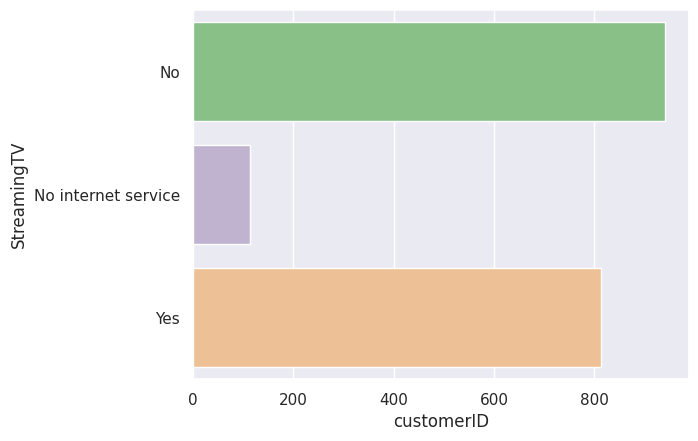

In [70]:
#Plotando quantidade de clientes por genero
sns.barplot(data=Churn_StreamingTV, x = "customerID",y = "StreamingTV")

#Etapa 02) Tratamento dos Dados (Data Preparation)

##Data Preparation

In [72]:
#Transformando valores churned 0 e 1 por No e Yes
df['Churn'] = df['Churn'].replace(0, 'No')
df['Churn'] = df['Churn'].replace(1, 'Yes')

In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Etapa 03) Modelagem dos Dados - Regressão Logística

##Regressão Logística

In [74]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
#Definindo variáveis, não queremos o user_id e o churned pois o churned será utilizado na variável y e o user id não é parâmetro
X = df.drop(columns=['customerID', 'Churn'], axis = 1)

In [76]:
#Definindo variáveis
y = df[['Churn']]

In [79]:
#Fitando modelo
le = LabelEncoder()
le.fit(y.Churn)
y.Churned = le.transform(y.Churn)
X = pd.get_dummies(X)

<ipython-input-79-0efe8301d636>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.Churned = le.transform(y.Churn)


In [80]:
#Feature engineering
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [81]:
#Separando a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [82]:
#Modelando
model = LogisticRegression()

In [83]:
#Fitando o modelo
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
lr.predict(X_test)

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [85]:
X_test.assign(clients=y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,6567,6568,6569,6570,6571,6572,6573,6574,clients,label
991,0.0,0.805556,0.060697,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
2781,1.0,0.097222,0.260199,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,Yes
2700,0.0,0.486111,0.058706,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5595,0.0,0.027778,0.011443,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5029,0.0,0.097222,0.318905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,0.0,0.930556,0.065672,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
1301,0.0,0.916667,0.397512,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5046,0.0,0.013889,0.267662,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
3577,0.0,0.500000,0.469154,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


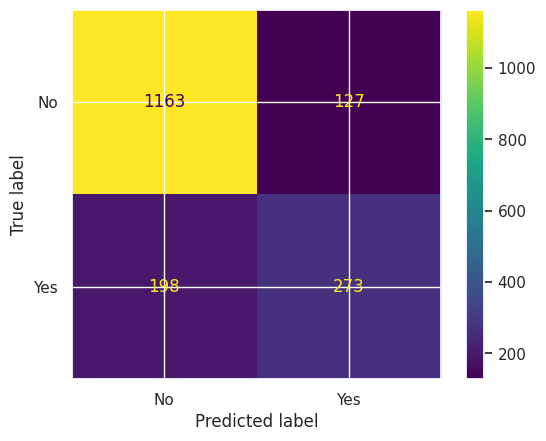

In [86]:
#Matriz confusão
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = "d")

In [92]:
#Métricas
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
# print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
# print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
# print("====================================")
# print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
# print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
# print("====================================")
# print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
# print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
# print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8794017417644832
Acurácia (Teste): 0.8154457694491766
Acurácia Balanceada (Treino): 0.813609150338353
Acurácia Balanceada (Teste): 0.7405841109959018
ROCAUC (Treino): 0.9325782086812263
ROCAUC (Teste): 0.8534686219325532


#Etapa 04) Modelagem dos Dados - Random Forest

##Random Forest


In [93]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [94]:
rf.fit(X_train, y_train)

<ipython-input-94-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [95]:
rf.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [96]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,6567,6568,6569,6570,6571,6572,6573,6574,churn,label
991,0.0,0.805556,0.060697,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
2781,1.0,0.097222,0.260199,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
2700,0.0,0.486111,0.058706,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5595,0.0,0.027778,0.011443,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5029,0.0,0.097222,0.318905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,0.0,0.930556,0.065672,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
1301,0.0,0.916667,0.397512,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5046,0.0,0.013889,0.267662,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
3577,0.0,0.500000,0.469154,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No


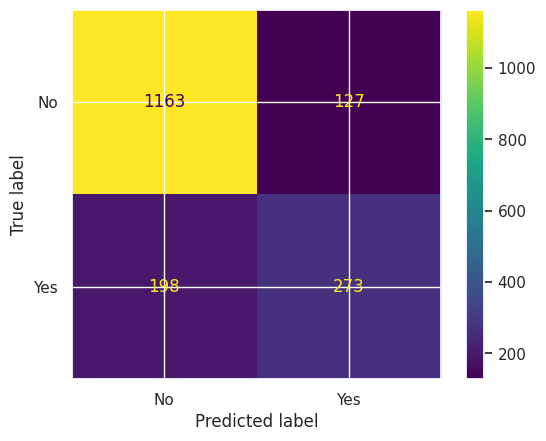

In [97]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = "d")

In [99]:

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
# print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
# print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
# print("====================================")
# print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
# print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
# print("====================================")
# print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
# print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
# print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9981067777357062
Acurácia (Teste): 0.787052810902896
Acurácia Balanceada (Treino): 0.9973391441945165
Acurácia Balanceada (Teste): 0.6733520959857799
ROCAUC (Treino): 0.9999336996061757
ROCAUC (Teste): 0.8268240096117447


#Etapa 05) Modelagem dos Dados - Tunning

##Tunning

In [100]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [101]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [102]:
dict = grid_search.best_estimator_.get_params()

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)

In [104]:
rf_tunned.fit(X_train, y_train)

<ipython-input-104-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [105]:
rf_tunned.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [106]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,6567,6568,6569,6570,6571,6572,6573,6574,churn,label
991,0.0,0.805556,0.060697,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
2781,1.0,0.097222,0.260199,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
2700,0.0,0.486111,0.058706,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5595,0.0,0.027778,0.011443,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5029,0.0,0.097222,0.318905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,0.0,0.930556,0.065672,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
1301,0.0,0.916667,0.397512,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
5046,0.0,0.013889,0.267662,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No
3577,0.0,0.500000,0.469154,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,No


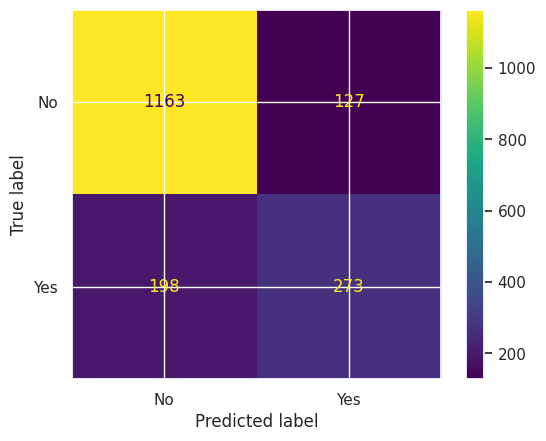

In [107]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = "d")

In [109]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
# print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
# print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
# print("====================================")
# print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
# print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
# print("====================================")
# print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
# print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
# print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7353275274517228
Acurácia (Teste): 0.7325383304940375
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
ROCAUC (Treino): 0.8517966117552072
ROCAUC (Teste): 0.8251798087526129
